# Лабораторная работа №4

Выполнили: Климовский Дмитрий, Грудинин Михаил

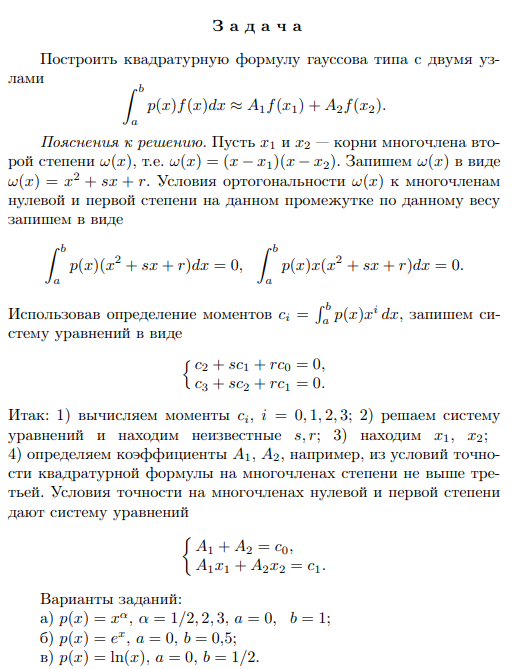

### Задача
Необходимо построить квадратурную формулу Гаусса типа с двумя узлами для интеграла

$$
\int_a^b p(x) f(x) \, dx \approx A_1 f(x_1) + A_2 f(x_2),
$$

где $x_1$ и $x_2$ — корни многочлена второго порядка.

### Шаги решения
1. **Обозначим многочлен:** Пусть $ \omega(x) = (x - x_1)(x - x_2) = x^2 + sx + r$.
2. **Запишем условия ортогональности:** Мы имеем два условия:

   $$
   \int_a^b p(x) \omega(x) \, dx = 0 \quad \text{и} \quad \int_a^b p(x)x \omega(x) \, dx = 0.
   $$

3. **Определим моменты:** Определим моменты $c_i = \int_a^b p(x)x^i \, dx$ для $i = 0, 1, 2, 3$.

4. **Составим систему уравнений:** Система уравнений будет выглядеть следующим образом:

   $$
   \begin{cases}
   c_2 + s c_1 + r c_0 = 0, \\
   c_3 + s c_2 + r c_1 = 0.
   \end{cases}
   $$

5. **Найти коэффициенты $A_1$ и $A_2$**

6. **Построить квадратурную форму**


## Общая реализация для произвольной функции

In [36]:
import sympy as sp

In [37]:
x = sp.symbols('x')

In [60]:

def SolveTask(p_x, a, b):
    if a == b:
        return sp.numer(0)
    
    # Определяем моменты
    c0 = sp.integrate(p_x, (x, a, b))
    c1 = sp.integrate(p_x * x, (x, a, b))
    c2 = sp.integrate(p_x * x**2, (x, a, b))
    c3 = sp.integrate(p_x * x**3, (x, a, b))

    # Определяем систему уравнений
    s, r = sp.symbols('s r')
    eq1 = sp.Eq(c2 + s * c1 + r * c0, 0)
    eq2 = sp.Eq(c3 + s * c2 + r * c1, 0)

    # Решаем систему уравнений
    solution = sp.solve((eq1, eq2), (s, r))

    # Выводим решение
    s_val, r_val = solution[s], solution[r]
    s_val, r_val

    # Находим корни многочлена z^2 + s*z + r = 0
    z = sp.symbols('z')
    roots = sp.solve(sp.Eq(z**2 + s_val*z + r_val, 0), z)
    x1_val, x2_val = roots[0], roots[1]

    # Определяем A1 и A2
    A1, A2 = sp.symbols('A1 A2')
    eq3 = sp.Eq(A1 + A2, c0)
    eq4 = sp.Eq(A1 * x1_val + A2 * x2_val, c1)

    # Решаем систему для A1 и A2
    A_solution = sp.solve((eq3, eq4), (A1, A2))

    # Используем ранее найденные узлы и коэффициенты
    f = sp.Function('f')  # Определим функцию f(x)

    # Квадратурная формула
    quadrature_formula = A_solution[A1] * f(x1_val) + A_solution[A2] * f(x2_val)
    
    return quadrature_formula

## Задача А

In [61]:
SolveTask(x**(1/2), 0, 1)

0.277555998231062*f(0.28994919792569) + 0.389110668435605*f(0.821161913185421)

In [62]:
SolveTask(x**(2), 0, 1)

(1/6 - sqrt(10)/48)*f(2/3 - sqrt(10)/15) + (sqrt(10)/48 + 1/6)*f(sqrt(10)/15 + 2/3)

In [63]:
SolveTask(x**(3), 0, 1)

(1/8 - 3*sqrt(15)/200)*f(5/7 - sqrt(15)/21) + (3*sqrt(15)/200 + 1/8)*f(sqrt(15)/21 + 5/7)

## Задача Б

In [64]:
SolveTask(sp.exp(x), 0, 0)

0

In [65]:
SolveTask(sp.exp(x), 0, 5)

(-2*exp(15) - sqrt(-832*exp(15) + 8 + 168*exp(5) + 23773*exp(10) + 8*exp(20)) + 2 + 119*exp(5) + 131*exp(10) + sqrt(-832*exp(15) + 8 + 168*exp(5) + 23773*exp(10) + 8*exp(20))*exp(5))*f((-sqrt(-832*exp(15) + 8 + 168*exp(5) + 23773*exp(10) + 8*exp(20)) - 77*exp(5) - 4 + 6*exp(10))/(2*(-27*exp(5) + 1 + exp(10))))/(2*sqrt(-832*exp(15) + 8 + 168*exp(5) + 23773*exp(10) + 8*exp(20))) + (-131*exp(10) - sqrt(-832*exp(15) + 8 + 168*exp(5) + 23773*exp(10) + 8*exp(20)) - 119*exp(5) - 2 + sqrt(-832*exp(15) + 8 + 168*exp(5) + 23773*exp(10) + 8*exp(20))*exp(5) + 2*exp(15))*f((-77*exp(5) - 4 + sqrt(-832*exp(15) + 8 + 168*exp(5) + 23773*exp(10) + 8*exp(20)) + 6*exp(10))/(2*(-27*exp(5) + 1 + exp(10))))/(2*sqrt(-832*exp(15) + 8 + 168*exp(5) + 23773*exp(10) + 8*exp(20)))

In [66]:
SolveTask(sp.exp(x), 0, 0.5)

0.2964053720216*f(0.114360977165048) + 0.352315898678528*f(0.402315527627975)

## Задача В

In [57]:
SolveTask(sp.ln(x), 0, 0.5)

-0.545589255997713*f(0.0724959371369302) - 0.30098433428226*f(0.364106635070999)